# Data Preparations

## Original Spotify Dataset

In [ ]:
import pandas as pd

# Load the Spotify dataset (replace with your file path if needed)
df_original = pd.read_csv('dataset.csv')

# Show the first few rows of the dataset
df_original.head()

# Get an overview of the dataset
df_original.info()

# Check for missing values
df_original.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df_original.track_genre.value_counts()

,count
track_genre,
acoustic,1000
punk-rock,1000
progressive-house,1000
power-pop,1000
pop,1000
...,...
folk,1000
emo,1000
electronic,1000


In [ ]:
df_original.track_genre.describe()

,track_genre
count,114000
unique,114
top,acoustic
freq,1000


In [ ]:
df_original.track_genre.value_counts(normalize = True )

,proportion
track_genre,
acoustic,0.008772
punk-rock,0.008772
progressive-house,0.008772
power-pop,0.008772
pop,0.008772
...,...
folk,0.008772
emo,0.008772
electronic,0.008772


At the beggining the dataset is balanced but later on you will see it gets very imbalanced after cleaning the data.

**This is the original spotify dataset from kaggle.**
There are 21 columns (including unnamed:0 which is not related to the data in any way and track_genre which is the target variable in this current classification project).

**Now lets inspect the final_clean_dataset after full EDA :**

(in accordance to a different buisness question focusing on finding connection between popularity and happiness if happiness relys on tempo and valence features)

## Load and inspect dataset after full EDA

In [ ]:
import pandas as pd

# Load the Spotify dataset (replace with your file path if needed)
df = pd.read_csv('final_clean_dataset.csv')

# Show the first few rows of the dataset
print(df.head())

# Get an overview of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Count the number of duplicate track_id entries
duplicate_count = df['track_id'].duplicated().sum()

print(f"Number of duplicate track_id entries: {duplicate_count}")

# Check for duplicate rows in the entire dataset
duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")



                    track_name                track_id  \
0               !I'll Be Back!  0fROT4kK5oTm8xO8PX6EJF   
1          "A" You're Adorable  1hH0t381PIXmUVWyG1Vj3p   
2            "C" IS FOR COOKIE  1B45DvGMoFWdbAEUH2qliG   
3            "C" is for Cookie  73lXf5if6MWVWnsgXhK8bd   
4  "Christe, Redemptor omnium"  0jmz4aHEIBCRgrcV2xEkwB   

                                             artists  \
0                                              Rilès   
1                                       Brian Hyland   
2                                  Little Apple Band   
3                                  Little Apple Band   
4  Traditional;Sistine Chapel Choir;Massimo Palom...   

                            album_name  popularity  duration_ms  explicit  \
0                       !I'll Be Back!        52.0     178533.0      True   
1                    The Bashful Blond        39.0     151680.0     False   
2  The Favorite Songs Of Sesame Street        32.0      84305.0     False   
3     

**In the final_clean_dataset we see these are 20 columns.** (including track_genre, removed only unnamed:0 which was irrelevant)

**Also we see there are 7457 duplicates track_id** -
The duplicates are a significant portion of the final_clean_dataset.

In the last EDA (focused on specific features like popularity, tempo and valence) the data was cleaned in a way that helps keeping duplicate track_id that has different data in these specific columns.
So we know that there are duplicates, and now that the buisness question has changes, we now care about all features and want to explore while removing NOISE such as duplicates.

BUT removing NOISE, will necesserily mean that we remove a lot of data so first we want to check for the VARIANCE within these duplicates, in order to decide wether to remove them or not.

Removing one row could lead to losing important variance that could impact how well the model learns to classify genres.

Why It Matters: When building a classification model, you want to maximize the relevant feature information for the model to learn from. Removing rows might oversimplify the data and reduce the performance of the classifier if those differences are important.

In [ ]:
# Get all duplicates, keeping all occurrences and sort by track_id
duplicates = df[df.duplicated('track_id', keep=False)].sort_values('track_id')
print(duplicates)


               track_name                track_id          artists  \
69487      Mr. Brightside  003vvx7Niy0yvhvHt4a68B      The Killers   
69891      Mr. Brightside  003vvx7Niy0yvhvHt4a68B      The Killers   
84385      Mr. Brightside  003vvx7Niy0yvhvHt4a68B      The Killers   
78505         Sleigh Ride  00970cTs7LnxWt0d5Qk08m  Ella Fitzgerald   
70440         Sleigh Ride  00970cTs7LnxWt0d5Qk08m  Ella Fitzgerald   
...                   ...                     ...              ...   
70405  Frosty The Snowman  7zrxUrilLtTk4XnT5G7zF8  Ella Fitzgerald   
79676            Ley Seca  7zubR9uYAWjb5KPZTMm85e  Jhayco;Anuel AA   
83425            Ley Seca  7zubR9uYAWjb5KPZTMm85e  Jhayco;Anuel AA   
82907            Ley Seca  7zubR9uYAWjb5KPZTMm85e  Jhayco;Anuel AA   
79205            Ley Seca  7zubR9uYAWjb5KPZTMm85e  Jhayco;Anuel AA   

                            album_name  popularity  duration_ms  explicit  \
69487                         Hot Fuss        86.0     222973.0     False   
69891

**Out of 7457 track_id duplicates, we see there are 11753 rows as a result of these duplicates.**

In [ ]:
import pandas as pd

# Group by track_id
grouped = duplicates.groupby('track_id')

# Create a list to store results
variance_summary = []

# Loop through each group to check for variance
for track_id, group in grouped:
    # Get the number of duplicates
    num_duplicates = group.shape[0]

    # Calculate variance for numerical columns
    numerical_variance = group.select_dtypes(include='number').var().sum()

    # Get unique values for categorical columns
    categorical_variance = {col: group[col].unique() for col in group.select_dtypes(exclude='number').columns}

    # Append results to the list
    variance_summary.append({
        'track_id': track_id,
        'num_duplicates': num_duplicates,
        'numerical_variance': numerical_variance,
        'categorical_variance': categorical_variance
    })

# Convert the list to a DataFrame
variance_summary_df = pd.DataFrame(variance_summary)

# Display the summary
print(variance_summary_df)


                    track_id  num_duplicates  numerical_variance  \
0     003vvx7Niy0yvhvHt4a68B               3        4.911121e-33   
1     00970cTs7LnxWt0d5Qk08m               2        0.000000e+00   
2     00PBSElFPJbnIcFS7orAm2               4        0.000000e+00   
3     00YwP3wJWiG8IxAA7OS9lo               6        2.666667e-01   
4     00ZGWtUFiGqWuFd7i4OeZV               3        2.312921e-32   
...                      ...             ...                 ...   
4291  7ze8MSZXvWZCH5LQ9BmvyI               2        0.000000e+00   
4292  7znniOrVgnRjxIfwHjA9m6               3        3.697785e-32   
4293  7zo6hLIhyY7zGCR0sWKvth               2        0.000000e+00   
4294  7zrxUrilLtTk4XnT5G7zF8               2        0.000000e+00   
4295  7zubR9uYAWjb5KPZTMm85e               4        0.000000e+00   

                                   categorical_variance  
0     {'track_name': ['Mr. Brightside'], 'track_id':...  
1     {'track_name': ['Sleigh Ride'], 'track_id': ['...  
2     {'t

**We see that 4296 unique duplicates of track_id  have a numerical variance very close to ZERO !
This means that these track_id duplicates are nothing but NOISE** and this is a good reason to remove all 11753 rows related to these duplicates).

The number of unique track_id shows 4296 which is different than before, due to the grouping in this code but as you can see in the block below - this summary addresses all the duplicate track_id.

In [ ]:
# Get unique track_ids in the original dataset
all_unique_track_ids = set(duplicates['track_id'].unique())

# Get track_ids from your variance summary DataFrame
summary_track_ids = set(variance_summary_df['track_id'])

# Find missing track_ids (those that are in the original but not in the summary)
missing_track_ids = all_unique_track_ids - summary_track_ids

# Display missing track_ids if any
print("Missing track_ids:", missing_track_ids)


Missing track_ids: set()


In [ ]:
# Sum the number of duplicates from the variance summary to check if it matches the total rows
total_duplicate_rows = variance_summary_df['num_duplicates'].sum()
print("Total number of duplicate rows:", total_duplicate_rows)


Total number of duplicate rows: 11753


## Final cleanup before moving forward to classification project

**Removing the duplicates track_id rows:**

(keeping only the first row out of each unique duplicate)

In [ ]:
# Remove duplicates, keeping the first occurrence
df_cleaned = df.drop_duplicates(subset='track_id', keep='first')

# Reset the index and drop the old index column
df_cleaned = df_cleaned.reset_index(drop=True)

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


print(df_cleaned.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80405 entries, 0 to 80404
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        80405 non-null  object 
 1   track_id          80405 non-null  object 
 2   artists           80405 non-null  object 
 3   album_name        80405 non-null  object 
 4   popularity        80405 non-null  float64
 5   duration_ms       80405 non-null  float64
 6   explicit          80405 non-null  bool   
 7   danceability      80405 non-null  float64
 8   energy            80405 non-null  float64
 9   key               80405 non-null  float64
 10  loudness          80405 non-null  float64
 11  mode              80405 non-null  float64
 12  speechiness       80405 non-null  float64
 13  acousticness      80405 non-null  float64
 14  instrumentalness  80405 non-null  float64
 15  liveness          80405 non-null  float64
 16  valence           80405 non-null  float6

In [ ]:
# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()

# Display columns with missing values (if any)
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
df_cleaned.columns

Index(['track_name', 'track_id', 'artists', 'album_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [ ]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,80405.0,33.480107,20.197015,0.000,20.0000,33.000000,48.0000,100.000
duration_ms,80405.0,230140.012748,115637.084042,8586.000,173277.0000,214253.000000,265800.0000,5237295.000
danceability,80405.0,0.561828,0.177430,0.000,0.4490,0.576000,0.6930,0.985
energy,80405.0,0.637923,0.256098,0.000,0.4620,0.680000,0.8560,1.000
key,80405.0,5.287955,3.555843,0.000,2.0000,5.000000,8.0000,11.000
loudness,80405.0,-8.489271,5.227270,-49.531,-10.3120,-7.171000,-5.0990,4.532
mode,80405.0,0.635931,0.481171,0.000,0.0000,1.000000,1.0000,1.000
speechiness,80405.0,0.088979,0.115941,0.000,0.0361,0.049300,0.0876,0.965
acousticness,80405.0,0.327676,0.337821,0.000,0.0167,0.188000,0.6230,0.996
instrumentalness,80405.0,0.173719,0.324025,0.000,0.0000,0.000058,0.0985,1.000


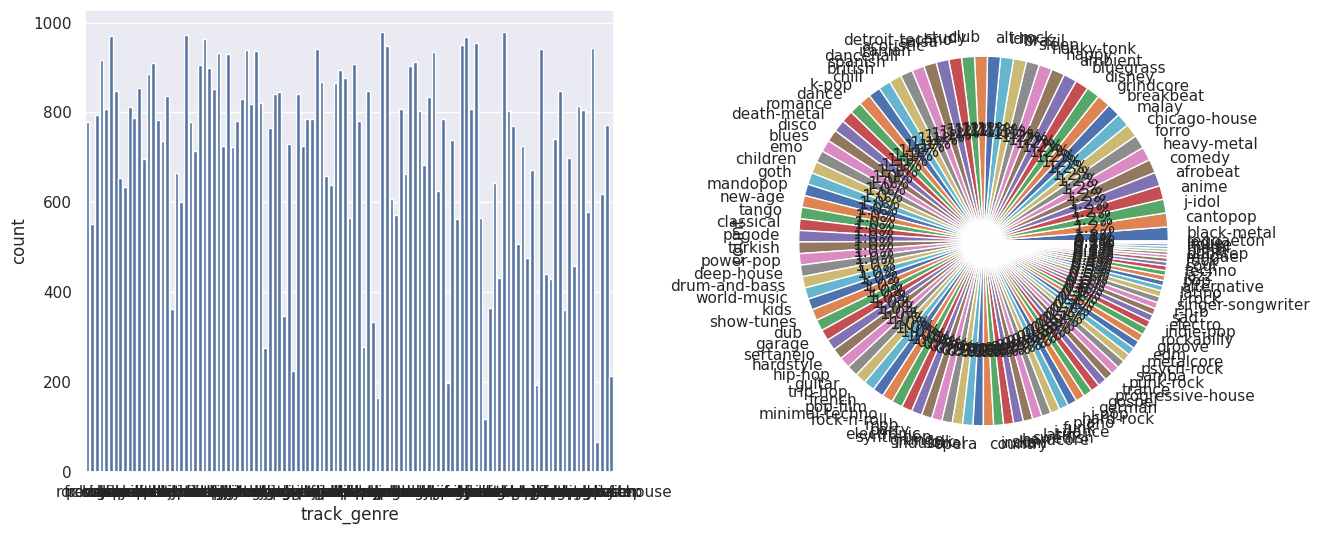

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='track_genre', data=df_cleaned, ax=ax[0])
_ = df_cleaned['track_genre'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

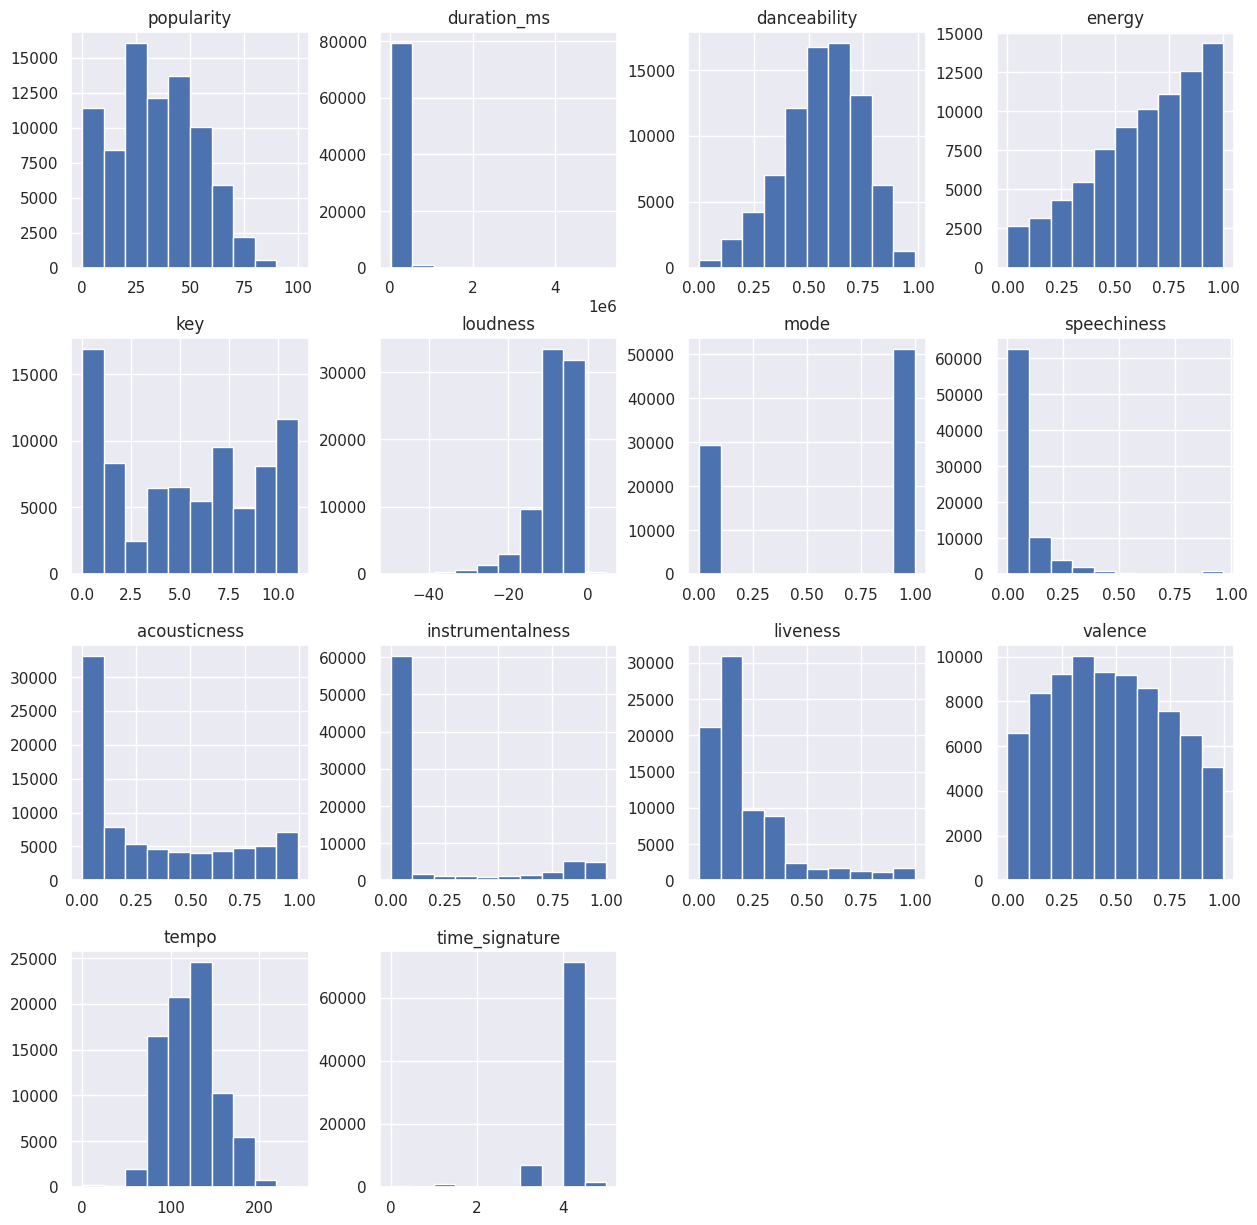

In [ ]:
df_cleaned.hist(figsize=(15,15))
plt.show()

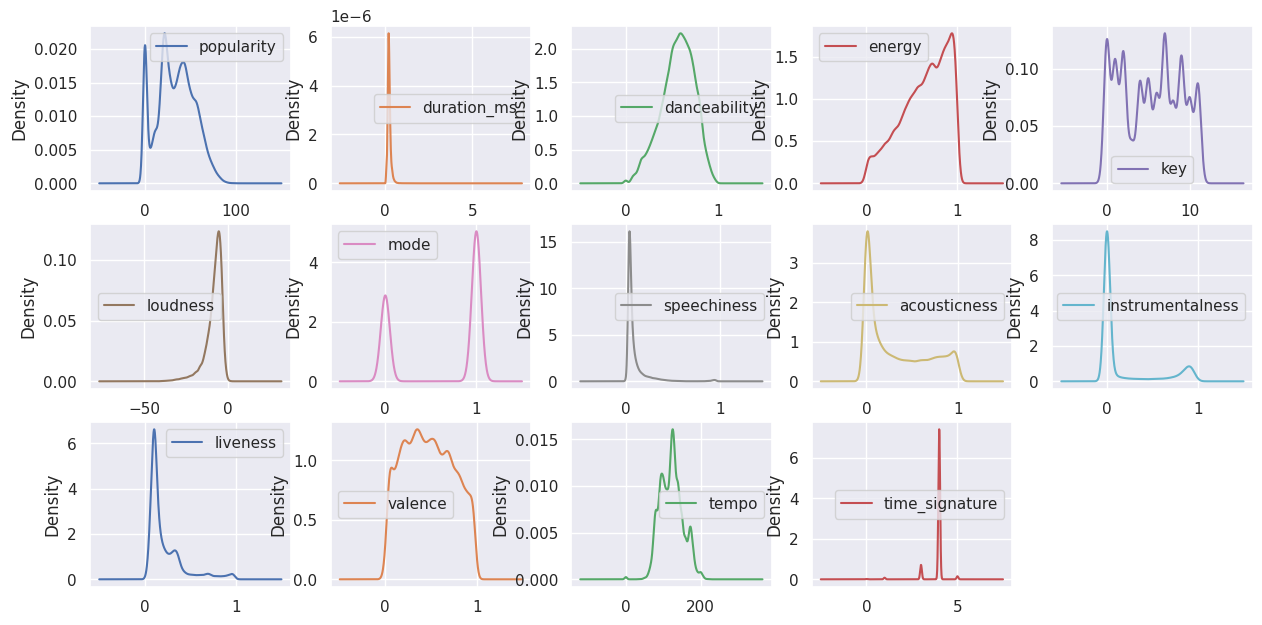

In [ ]:
df_cleaned.plot(kind="density", layout=(6,5),
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

**Skewness**

A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.



to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

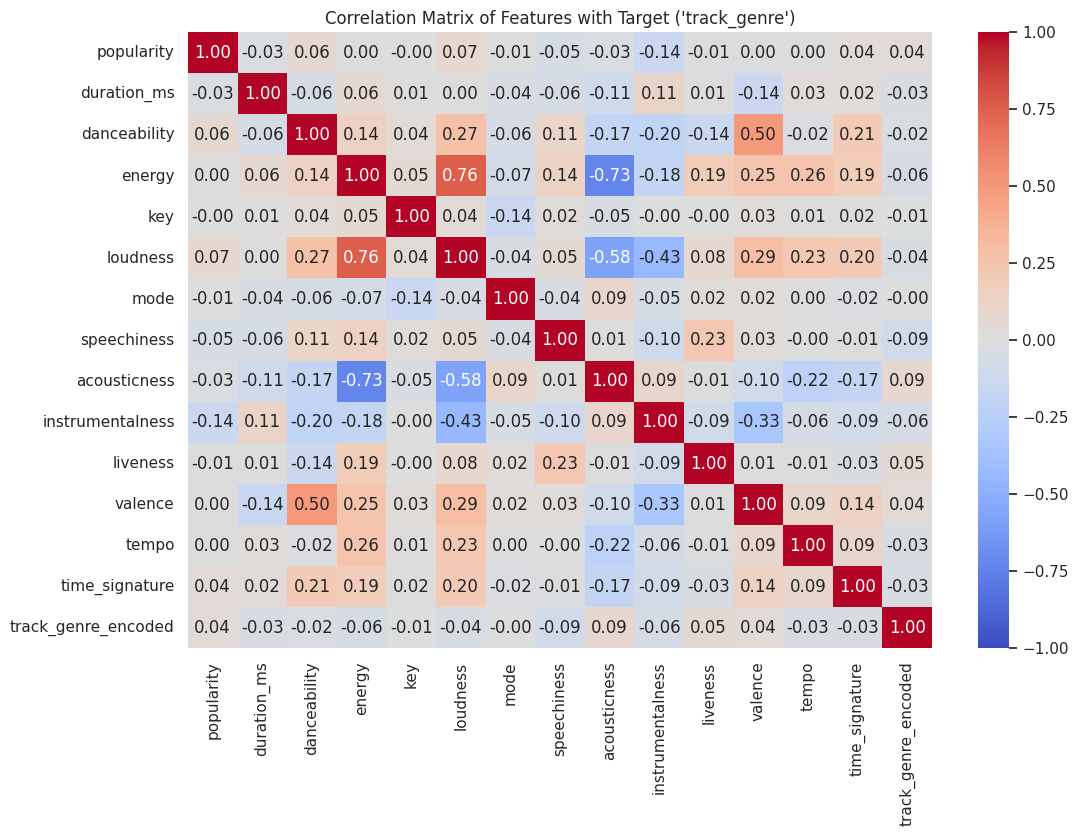

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is loaded in a DataFrame called df
# Encode the target variable 'track_genre'
le = LabelEncoder()
df_cleaned['track_genre_encoded'] = le.fit_transform(df_cleaned['track_genre'])

# Select numeric columns for correlation
numeric_columns = ['popularity', 'duration_ms', 'danceability', 'energy',
                   'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                   'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
                   'track_genre_encoded']

# Calculate the correlation matrix
corr_matrix = df_cleaned[numeric_columns].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features with Target ('track_genre')")
plt.show()


From the correlation matrix , we can see the relationships between the features and the target variable track_genre_encoded. Here's how to interpret the correlations:


Correlation values range between -1 and 1:

A value of 1 means a perfect positive correlation (as one variable increases, the other also increases).

A value of -1 means a perfect negative correlation (as one variable increases, the other decreases).

A value near 0 means there is little to no linear correlation between the two variables.

Correlation with track_genre_encoded:
popularity: 0.04

Weak positive correlation with the target variable.
duration_ms: -0.03

Weak negative correlation with the target variable.
danceability: -0.02

Very weak negative correlation with the target variable.
energy: -0.06

Weak negative correlation with the target variable.
key: -0.01

No significant correlation with the target variable.
loudness: -0.04

Weak negative correlation with the target variable.
mode: -0.00

No correlation with the target variable.
speechiness: -0.09

Weak negative correlation with the target variable.
acousticness: 0.09

Weak positive correlation with the target variable.
instrumentalness: -0.06

Weak negative correlation with the target variable.
liveness: 0.05

Weak positive correlation with the target variable.
valence: -0.03

Weak negative correlation with the target variable.
tempo: -0.03

Weak negative correlation with the target variable.
time_signature: -0.03

Weak negative correlation with the target variable.

Conclusion:

None of the features show a strong correlation (positive or negative) with the target variable track_genre_encoded. The correlations are quite weak, indicating that the features, in their current form, may not have a strong linear relationship with track_genre.

**This suggests that a more sophisticated model, perhaps one that captures non-linear relationships (such as decision trees or random forests), might be needed to predict track_genre based on these features.**

# Classification Project

In [ ]:
df_cleaned.describe(include='all')

,track_name,track_id,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
count,80405,80405,80405,80405,80405.000000,8.040500e+04,80405,80405.000000,80405.000000,80405.000000,...,80405.000000,80405.000000,80405.000000,80405.000000,80405.000000,80405.000000,80405.000000,80405.000000,80405,80405.000000
unique,73559,80405,29217,44204,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113,NaN
top,Rockin' Around The Christmas Tree,0fROT4kK5oTm8xO8PX6EJF,George Jones,The Complete Hank Williams,NaN,NaN,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,black-metal,NaN
freq,45,1,249,105,NaN,NaN,73378,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979,NaN
mean,NaN,NaN,NaN,NaN,33.480107,2.301400e+05,NaN,0.561828,0.637923,5.287955,...,0.635931,0.088979,0.327676,0.173719,0.220087,0.472848,122.172514,3.896847,NaN,52.344605
std,NaN,NaN,NaN,NaN,20.197015,1.156371e+05,NaN,0.177430,0.256098,3.555843,...,0.481171,0.115941,0.337821,0.324025,0.198069,0.263311,30.174024,0.455940,NaN,33.292565
min,NaN,NaN,NaN,NaN,0.000000,8.586000e+03,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,20.000000,1.732770e+05,NaN,0.449000,0.462000,2.000000,...,0.000000,0.036100,0.016700,0.000000,0.098300,0.253000,99.375000,4.000000,NaN,23.000000
50%,NaN,NaN,NaN,NaN,33.000000,2.142530e+05,NaN,0.576000,0.680000,5.000000,...,1.000000,0.049300,0.188000,0.000058,0.134000,0.463000,122.031000,4.000000,NaN,50.000000
75%,NaN,NaN,NaN,NaN,48.000000,2.658000e+05,NaN,0.693000,0.856000,8.000000,...,1.000000,0.087600,0.623000,0.098500,0.284000,0.686000,140.112000,4.000000,NaN,80.000000


<Axes: xlabel='track_genre'>

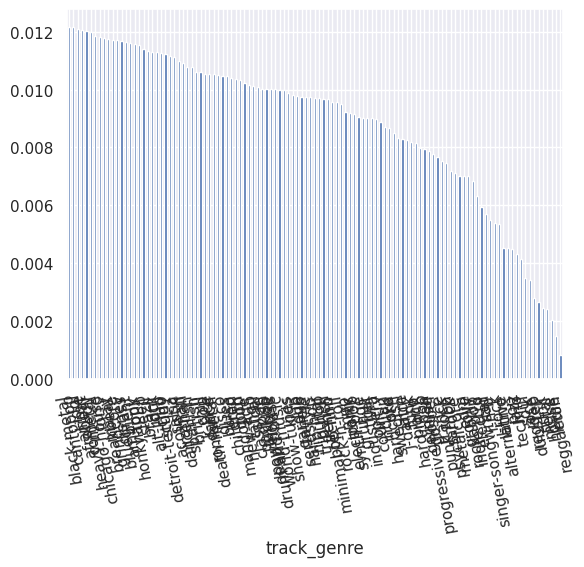

In [ ]:
df_cleaned['track_genre'].value_counts(normalize = True ).plot.bar(100, rot=100)

This shows there is a great imbalance between all track genres.

In [ ]:
df_cleaned.track_genre.value_counts().sort_values(ascending=False)[:10]

,count
track_genre,
black-metal,979
cantopop,979
j-idol,972
anime,969
afrobeat,967
comedy,964
heavy-metal,954
forro,951
chicago-house,947


<Axes: xlabel='track_genre'>

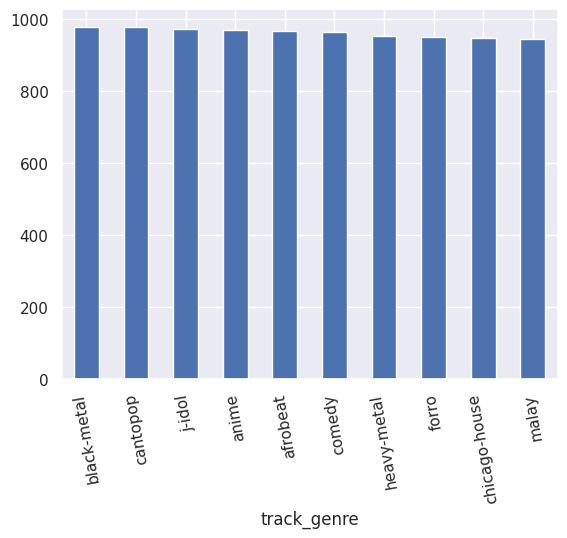

In [ ]:
df_cleaned.track_genre.value_counts().sort_values(ascending=False)[:10].plot.bar(100, rot=100)

Now we've got the top track_genre_encoded, in order to use them in the code later on.

dict(number encoded for the track_genre : value count)

These 10 max track_genres are at the top and they are balanced !!
Lets try to find the important features now.

## Scaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

# Initialize scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# Applying transformations based on skewness
# Use StandardScaler for features that need normalization based on their distribution
scaled_standard = standard_scaler.fit_transform(df_cleaned[['popularity', 'energy', 'danceability']])

# MinMax scaling for features like tempo, duration_ms that might span a wide range
scaled_min_max = min_max_scaler.fit_transform(df_cleaned[['tempo', 'duration_ms']])

# Power transformation (Yeo-Johnson) to handle skewness in features like loudness, instrumentalness, speechiness
scaled_power_transformed = yeo_johnson_transformer.fit_transform(df_cleaned[['loudness', 'instrumentalness', 'speechiness', 'acousticness']])

# Combine back into a DataFrame (if needed)
import numpy as np
import pandas as pd

scaled_df_cleaned = pd.DataFrame(np.hstack([scaled_standard, scaled_min_max, scaled_power_transformed]),
                         columns=['popularity_scaled', 'energy_scaled', 'danceability_scaled',
                                  'tempo_scaled', 'duration_ms_scaled',
                                  'loudness_transformed', 'instrumentalness_transformed',
                                  'speechiness_transformed', 'acousticness_transformed'])

Scaling Block: Used a combination of StandardScaler, MinMaxScaler, and Yeo-Johnson transformations to handle skewed and differently scaled features.

## Feature Engeneering

In [ ]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Generating polynomial features for loudness and tempo
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform the 'tempo' feature
poly_features = poly.fit_transform(df_cleaned[['tempo']])

# Get the feature names for the new polynomial features
poly_feature_names = poly.get_feature_names_out(['tempo'])

# Adding polynomial features to the DataFrame with appropriate names
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
df_cleaned = pd.concat([df_cleaned, poly_df], axis=1)

# Check the result
print(df_cleaned.head())

                    track_name                track_id  \
0               !I'll Be Back!  0fROT4kK5oTm8xO8PX6EJF   
1          "A" You're Adorable  1hH0t381PIXmUVWyG1Vj3p   
2            "C" IS FOR COOKIE  1B45DvGMoFWdbAEUH2qliG   
3            "C" is for Cookie  73lXf5if6MWVWnsgXhK8bd   
4  "Christe, Redemptor omnium"  0jmz4aHEIBCRgrcV2xEkwB   

                                             artists  \
0                                              Rilès   
1                                       Brian Hyland   
2                                  Little Apple Band   
3                                  Little Apple Band   
4  Traditional;Sistine Chapel Choir;Massimo Palom...   

                            album_name  popularity  duration_ms  explicit  \
0                       !I'll Be Back!        52.0     178533.0      True   
1                    The Bashful Blond        39.0     151680.0     False   
2  The Favorite Songs Of Sesame Street        32.0      84305.0     False   
3     

In [ ]:
# Interaction terms
# Create interactions between features that may affect the outcome together
df_cleaned['energy_danceability_interaction'] = df_cleaned['energy'] * df_cleaned['danceability']
df_cleaned['speechiness_acousticness_interaction'] = df_cleaned['speechiness'] * df_cleaned['acousticness']

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Drop the original tempo column if you don't want to keep it, or modify as needed
df_cleaned = pd.concat([df_cleaned, poly_df], axis=1)

# Log transformations to reduce skewness in highly skewed features
df_cleaned['log_duration_ms'] = np.log1p(df_cleaned['duration_ms'])  # log(1 + x) to handle zero values
df_cleaned['log_instrumentalness'] = np.log1p(df_cleaned['instrumentalness'])

# Binning the `valence` into categories (low, medium, high)
df_cleaned['valence_binned'] = pd.qcut(df_cleaned['valence'], q=3, labels=['low', 'medium', 'high'])

# Discretizing the `time_signature` since it's a categorical feature
df_cleaned['time_signature_binned'] = pd.cut(df_cleaned['time_signature'], bins=[0, 3, 4, 5], labels=['3/4', '4/4', '5/4'])

# Save the cleaned dataset
df_cleaned.to_csv('clean_engeneered_dataset.csv', index=False)

# Check the updated DataFrame
print(df_cleaned.head())

                    track_name                track_id  \
0               !I'll Be Back!  0fROT4kK5oTm8xO8PX6EJF   
1          "A" You're Adorable  1hH0t381PIXmUVWyG1Vj3p   
2            "C" IS FOR COOKIE  1B45DvGMoFWdbAEUH2qliG   
3            "C" is for Cookie  73lXf5if6MWVWnsgXhK8bd   
4  "Christe, Redemptor omnium"  0jmz4aHEIBCRgrcV2xEkwB   

                                             artists  \
0                                              Rilès   
1                                       Brian Hyland   
2                                  Little Apple Band   
3                                  Little Apple Band   
4  Traditional;Sistine Chapel Choir;Massimo Palom...   

                            album_name  popularity  duration_ms  explicit  \
0                       !I'll Be Back!        52.0     178533.0      True   
1                    The Bashful Blond        39.0     151680.0     False   
2  The Favorite Songs Of Sesame Street        32.0      84305.0     False   
3     

Feature Engineering Block: Included interaction terms, polynomial features, log transformations, binning, and discretization to enhance the predictive power of the features.

 performing feature engineering by creating interaction terms, polynomial features, log transformations, and binning:

1. Interaction Terms:
creating interaction features, which capture the combined effect of two variables that might affect the outcome together.

energy_danceability_interaction: This feature multiplies energy and danceability, which may reveal how tracks with both high energy and danceability relate to the target (track_genre).
speechiness_acousticness_interaction: This multiplies speechiness and acousticness, potentially capturing how the combination of spoken word and acoustic sounds correlates with different genres.
2. Polynomial Features:
By generating polynomial features for loudness and tempo with PolynomialFeatures(degree=2), it's introducing non-linear relationships between these variables and the target.

Polynomial features include the original feature (tempo), squared terms (tempo^2), and cross-products (if there were more than one feature).
These can help the model detect complex relationships that linear features might miss.
3. Log Transformations:
 applying log transformations to reduce skewness in highly skewed features.

log_duration_ms: Applying a log transformation to duration_ms helps make highly skewed distributions more normal (Gaussian), which often improves the performance of many machine learning models.
log_instrumentalness: Similarly, taking the log of instrumentalness reduces the impact of large outliers.
Using np.log1p() is a good practice because it ensures that zero values (common in datasets) don’t cause mathematical errors (logarithms of zero are undefined).

4. Binning:
valence_binned:  binning valence into 3 categories (low, medium, high) using pd.qcut(). This method of binning divides the data into quantiles, ensuring that each bin contains an equal number of data points.
Example: Tracks with valence values in the lower third of the distribution are labeled as "low," and so on. This is helpful when you want to treat a continuous feature as categorical.
time_signature_binned: You discretize time_signature into meaningful categories, treating it as a categorical feature with values like '3/4', '4/4', and '5/4'. This is useful when the time_signature is better understood as categories rather than a numeric variable.

## Model training

## Import Libraries

In [ ]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel


## Prepare Data for Model Training

In [ ]:
# Defining X (features) and y (target)
X = df_cleaned.drop(columns=['track_genre_encoded'])  # Drop the target column
y = df_cleaned['track_genre_encoded']  # Target column

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training models (Random Forest, SVM, Decision Tree, Logistic Regression) - Before feature engeneering

First few rows of the dataset:
                    track_name                track_id  \
0               !I'll Be Back!  0fROT4kK5oTm8xO8PX6EJF   
1          "A" You're Adorable  1hH0t381PIXmUVWyG1Vj3p   
2            "C" IS FOR COOKIE  1B45DvGMoFWdbAEUH2qliG   
3            "C" is for Cookie  73lXf5if6MWVWnsgXhK8bd   
4  "Christe, Redemptor omnium"  0jmz4aHEIBCRgrcV2xEkwB   

                                             artists  \
0                                              Rilès   
1                                       Brian Hyland   
2                                  Little Apple Band   
3                                  Little Apple Band   
4  Traditional;Sistine Chapel Choir;Massimo Palom...   

                            album_name  popularity  duration_ms  explicit  \
0                       !I'll Be Back!        52.0     178533.0      True   
1                    The Bashful Blond        39.0     151680.0     False   
2  The Favorite Songs Of Sesame Street        32.0  

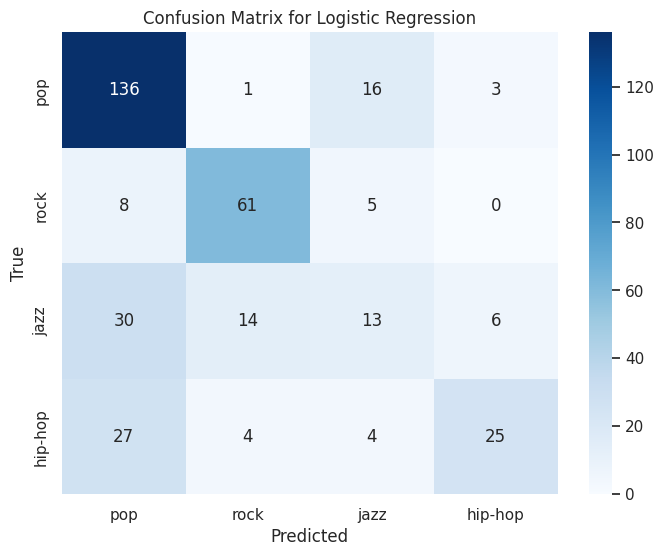


Evaluating model: Random Forest
Best Hyperparameters: {'classifier__max_depth': 30, 'classifier__n_estimators': 100}
Train Accuracy: 1.0000
Test Accuracy: 0.8074
F1 Score (Test): 0.8029


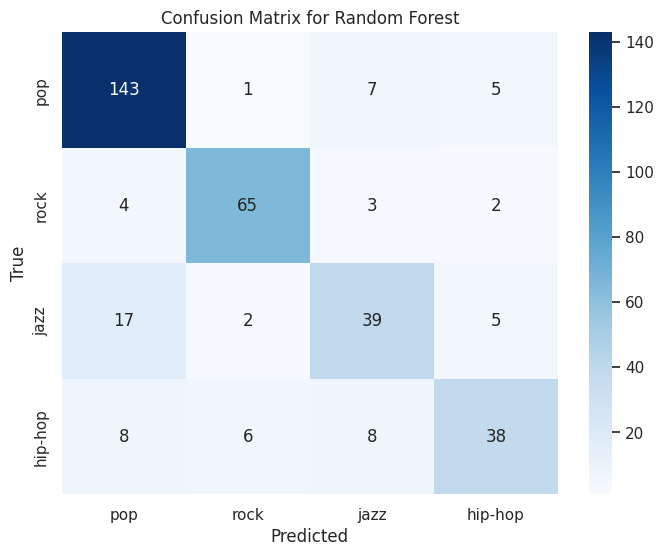


Evaluating model: Support Vector Machine
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Train Accuracy: 0.7661
Test Accuracy: 0.7535
F1 Score (Test): 0.7395


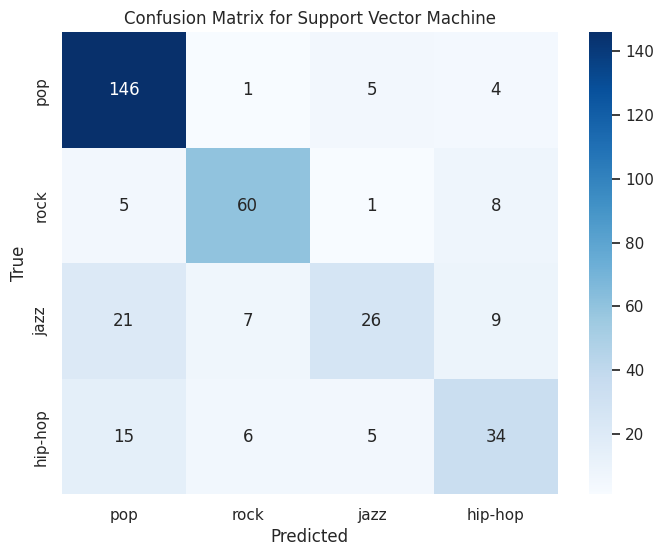


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 10}
Train Accuracy: 0.9206
Test Accuracy: 0.7705
F1 Score (Test): 0.7701


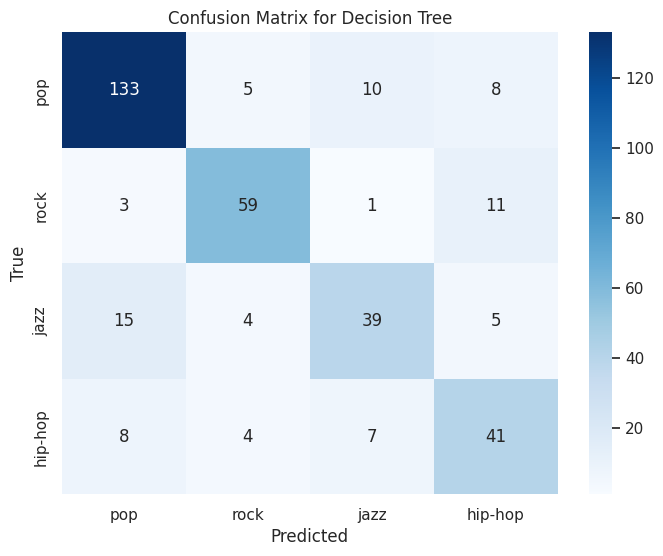


Model Comparison Summary:
                    Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0     Logistic Regression        0.676116       0.665722         0.639131   
1           Random Forest        1.000000       0.807365         0.802915   
2  Support Vector Machine        0.766123       0.753541         0.739498   
3           Decision Tree        0.920624       0.770538         0.770118   

                                         Best Params  
0                               {'classifier__C': 1}  
1  {'classifier__max_depth': 30, 'classifier__n_e...  
2  {'classifier__C': 10, 'classifier__kernel': 'r...  
3                      {'classifier__max_depth': 10}  


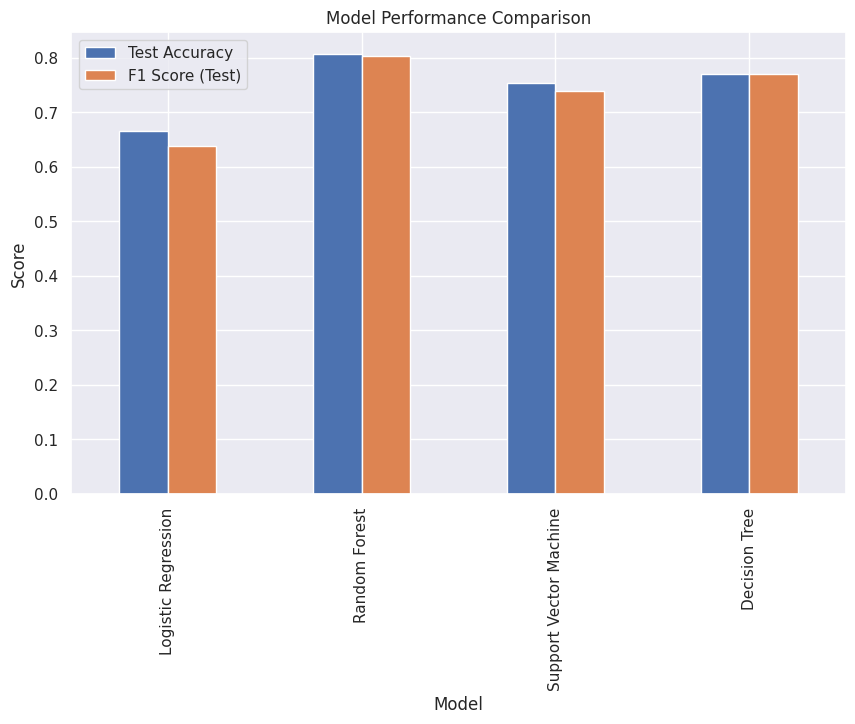

In [ ]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Define track genres to keep
    genres_to_keep = ['pop', 'rock', 'jazz', 'hip-hop']

    # Filter the dataframe to only include these genres
    df_filtered = df[df['track_genre'].isin(genres_to_keep)]

    # Keep only the specified columns
    columns_to_keep = ['popularity', 'danceability', 'energy', 'tempo', 'track_genre']
    df_filtered_subset = df_filtered[columns_to_keep]

    # Define target and features
    target_column = 'track_genre'
    X = df_filtered_subset.drop(target_column, axis=1)
    y = df_filtered_subset[target_column]

    # Check for missing values
    print("\nMissing values in the dataset:")
    print(X.isnull().sum())

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'classifier__C': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 10, 20, 30]
            }
        },
        'Support Vector Machine': {
            'model': SVC(),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genres_to_keep, yticklabels=genres_to_keep)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Display summary table
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main('clean_engeneered_dataset.csv')


## Training models (Random Forest, SVM, Decision Tree, Logistic Regression) - After feature engeneering

First few rows of the dataset:
                    track_name                track_id  \
0               !I'll Be Back!  0fROT4kK5oTm8xO8PX6EJF   
1          "A" You're Adorable  1hH0t381PIXmUVWyG1Vj3p   
2            "C" IS FOR COOKIE  1B45DvGMoFWdbAEUH2qliG   
3            "C" is for Cookie  73lXf5if6MWVWnsgXhK8bd   
4  "Christe, Redemptor omnium"  0jmz4aHEIBCRgrcV2xEkwB   

                                             artists  \
0                                              Rilès   
1                                       Brian Hyland   
2                                  Little Apple Band   
3                                  Little Apple Band   
4  Traditional;Sistine Chapel Choir;Massimo Palom...   

                            album_name  popularity  duration_ms  explicit  \
0                       !I'll Be Back!        52.0     178533.0      True   
1                    The Bashful Blond        39.0     151680.0     False   
2  The Favorite Songs Of Sesame Street        32.0  

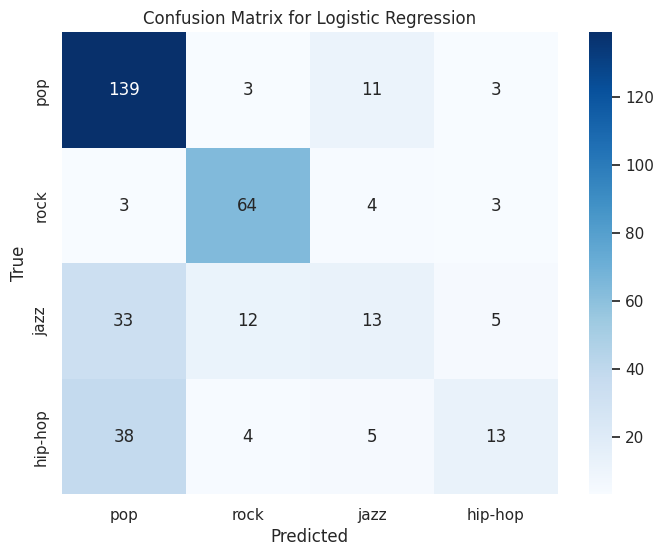


Evaluating model: Random Forest
Best Hyperparameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Train Accuracy: 0.9993
Test Accuracy: 0.7989
F1 Score (Test): 0.7941


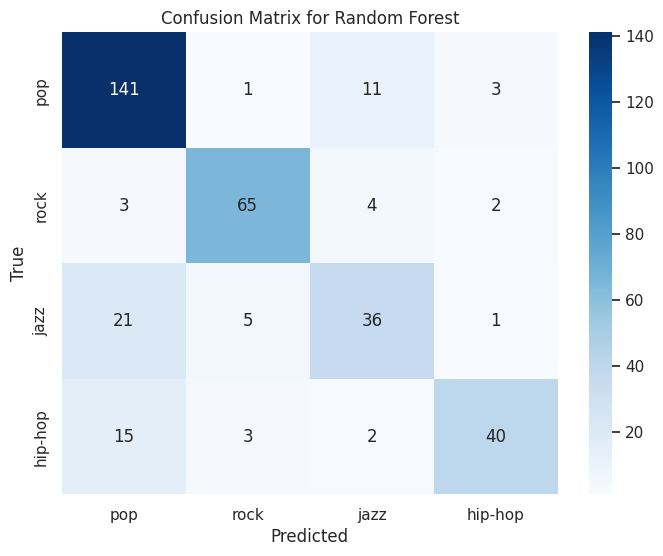


Evaluating model: Support Vector Machine
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Train Accuracy: 0.7328
Test Accuracy: 0.7054
F1 Score (Test): 0.6868


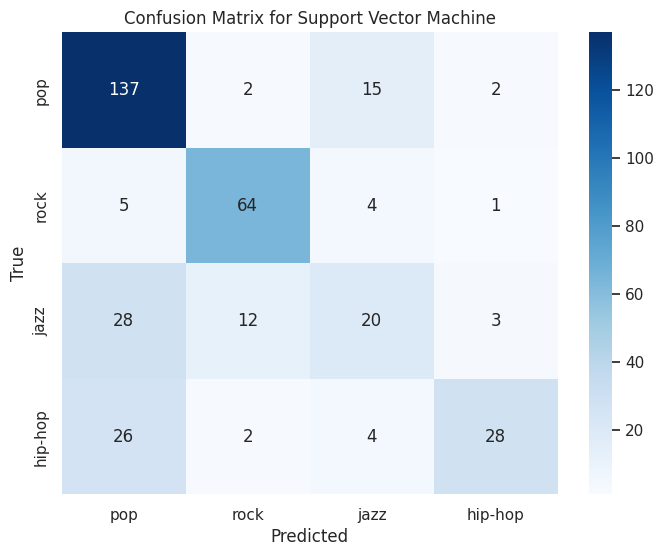


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 10}
Train Accuracy: 0.8944
Test Accuracy: 0.7365
F1 Score (Test): 0.7351


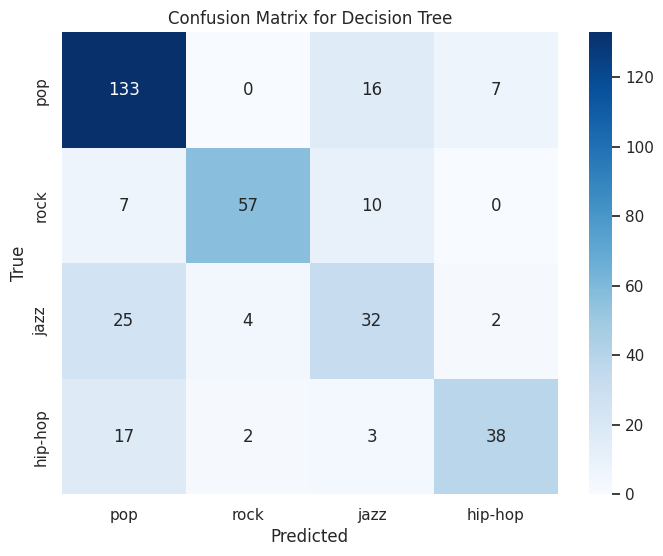


Model Comparison Summary:
                    Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0     Logistic Regression        0.625797       0.648725         0.604798   
1           Random Forest        0.999291       0.798867         0.794094   
2  Support Vector Machine        0.732814       0.705382         0.686846   
3           Decision Tree        0.894401       0.736544         0.735067   

                                         Best Params  
0                             {'classifier__C': 0.1}  
1  {'classifier__max_depth': None, 'classifier__n...  
2  {'classifier__C': 10, 'classifier__kernel': 'r...  
3                      {'classifier__max_depth': 10}  


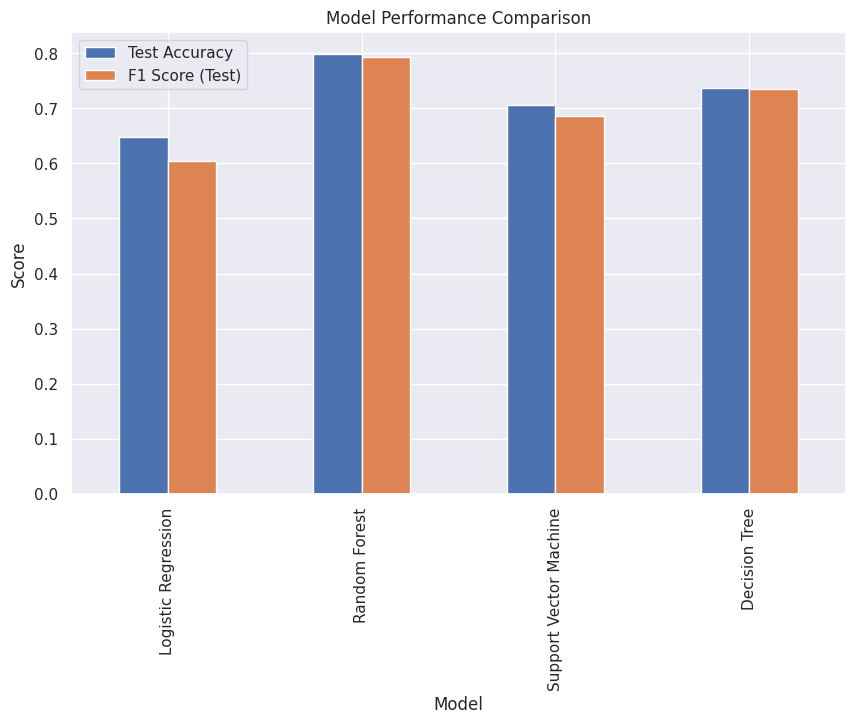

Feature importance for Decision Tree: [0.09510421 0.16574174 0.41920458 0.15226049 0.16768899]


In [ ]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Define track genres to keep
    genres_to_keep = ['pop', 'rock', 'jazz', 'hip-hop']

    # Filter the dataframe to only include these genres
    df_filtered = df[df['track_genre'].isin(genres_to_keep)]

    # Keep only the specified columns
    columns_to_keep = ['valence_binned', 'log_instrumentalness','log_duration_ms' ,'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2', 'track_genre']
    df_filtered_subset = df_filtered[columns_to_keep]

    # Define target and features
    target_column = 'track_genre'
    X = df_filtered_subset.drop(target_column, axis=1)
    y = df_filtered_subset[target_column]

    # Check for missing values
    print("\nMissing values in the dataset:")
    print(X.isnull().sum())

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'classifier__C': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 10, 20, 30]
            }
        },
        'Support Vector Machine': {
            'model': SVC(),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genres_to_keep, yticklabels=genres_to_keep)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Display summary table
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

    # Feature importance
    if model_name == "Random Forest":
        # For Random Forest, we can use feature importances
        importance = best_model.named_steps['randomforest'].feature_importances_
        print(f"Feature Importance for {model_name}: {importance}")

    elif model_name == "Logistic Regression":
        # For Logistic Regression, we can use model coefficients
        importance = best_model.named_steps['logistic'].coef_[0]
        print(f"Feature Coefficients for {model_name}: {importance}")

    elif model_name == "SVM" and grid_search.best_params_['svm__kernel'] == 'linear':
        # For linear SVM, we can use coefficients
        importance = best_model.named_steps['svm'].coef_[0]
        print(f"Feature Coefficients for {model_name}: {importance}")

    elif model_name == "Decision Tree":
        # For Decision Tree, we can use model coefficients
        importance = best_model.named_steps['classifier'].feature_importances_
        print(f"Feature importance for {model_name}: {importance}")


# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main('clean_engeneered_dataset.csv')


After feature engeneering (conclusions):

Logistic Regression didn't change as much (as expected), because the correlations between the features and the track_genre are skewed with tendency to non linear correlations.

Random Forest got better results - it doesn't overfit (train is less than 1) now and it is slightly better than desicion tree (it's expected for the complexity in the multi class dataset).

## Trying to improve the results for Random Forest model

Now keeping the same last features chosen, but taking balanced track_genres (as seen before).

First few rows of the dataset:
                    track_name                track_id  \
0               !I'll Be Back!  0fROT4kK5oTm8xO8PX6EJF   
1          "A" You're Adorable  1hH0t381PIXmUVWyG1Vj3p   
2            "C" IS FOR COOKIE  1B45DvGMoFWdbAEUH2qliG   
3            "C" is for Cookie  73lXf5if6MWVWnsgXhK8bd   
4  "Christe, Redemptor omnium"  0jmz4aHEIBCRgrcV2xEkwB   

                                             artists  \
0                                              Rilès   
1                                       Brian Hyland   
2                                  Little Apple Band   
3                                  Little Apple Band   
4  Traditional;Sistine Chapel Choir;Massimo Palom...   

                            album_name  popularity  duration_ms  explicit  \
0                       !I'll Be Back!        52.0     178533.0      True   
1                    The Bashful Blond        39.0     151680.0     False   
2  The Favorite Songs Of Sesame Street        32.0  

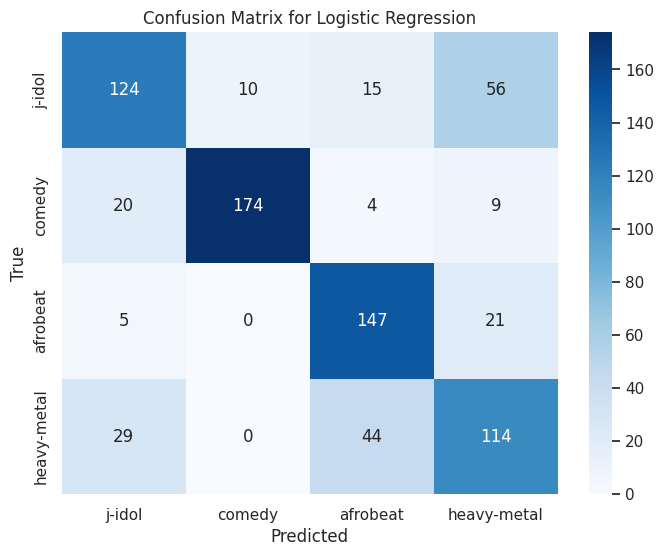


Evaluating model: Random Forest
Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 50}
Train Accuracy: 0.9997
Test Accuracy: 0.8135
F1 Score (Test): 0.8145


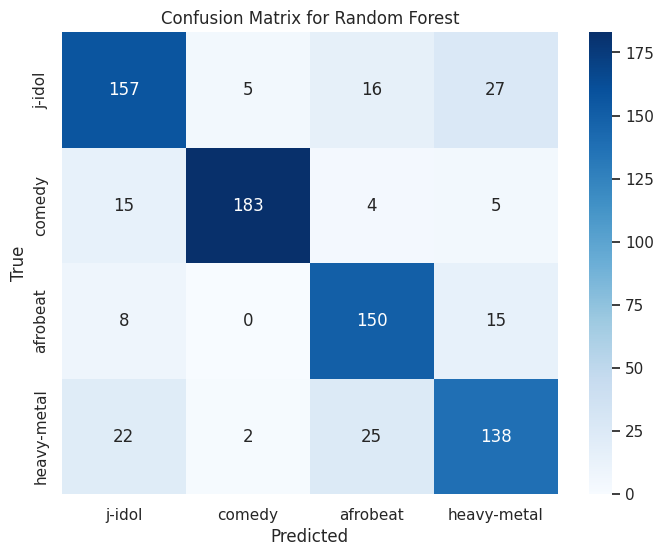


Evaluating model: Support Vector Machine
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Train Accuracy: 0.7614
Test Accuracy: 0.7202
F1 Score (Test): 0.7250


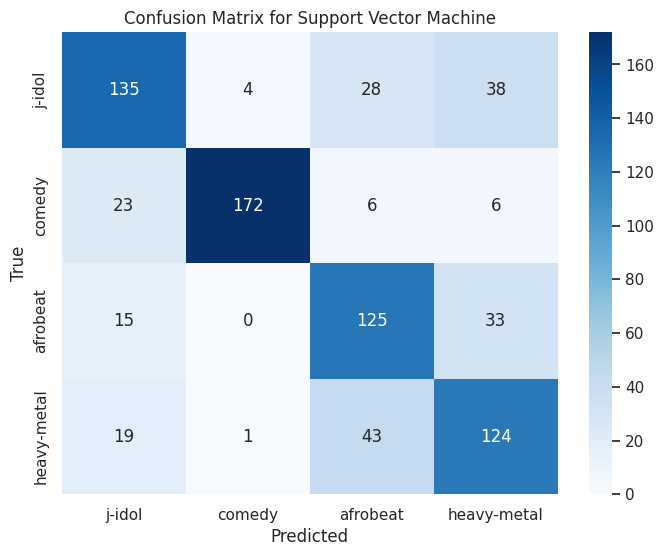


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 10}
Train Accuracy: 0.8947
Test Accuracy: 0.7642
F1 Score (Test): 0.7647


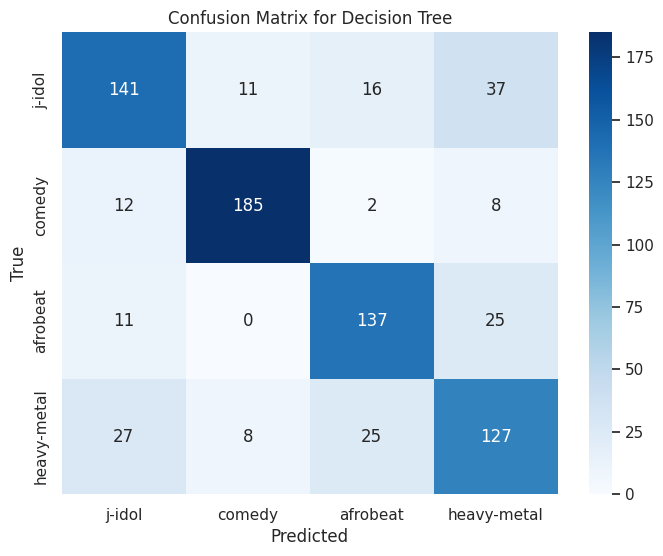


Model Comparison Summary:
                    Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0     Logistic Regression        0.740032       0.724093         0.725319   
1           Random Forest        0.999676       0.813472         0.814466   
2  Support Vector Machine        0.761426       0.720207         0.725022   
3           Decision Tree        0.894652       0.764249         0.764652   

                                         Best Params  
0                             {'classifier__C': 100}  
1  {'classifier__max_depth': 20, 'classifier__n_e...  
2  {'classifier__C': 10, 'classifier__kernel': 'r...  
3                      {'classifier__max_depth': 10}  


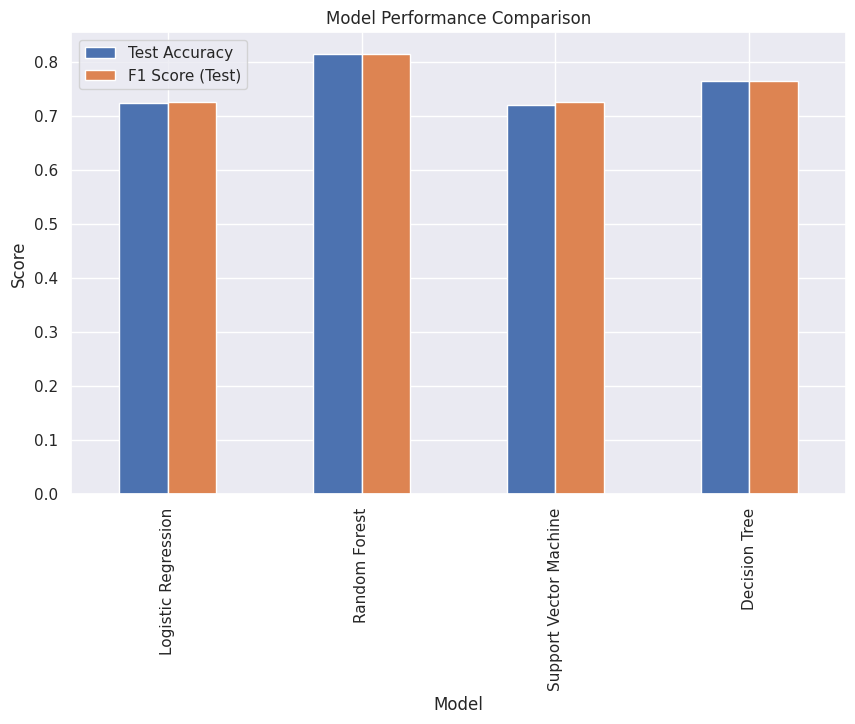

Feature importance for Decision Tree: [0.1297088  0.07742006 0.10006186 0.60578858 0.08702071]


In [ ]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Define track genres to keep
    genres_to_keep = ['j-idol', 'comedy', 'afrobeat', 'heavy-metal']

    # Filter the dataframe to only include these genres
    df_filtered = df[df['track_genre'].isin(genres_to_keep)]

    # Keep only the specified columns
    columns_to_keep = ['valence_binned', 'log_instrumentalness','log_duration_ms' ,'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2', 'track_genre']
    df_filtered_subset = df_filtered[columns_to_keep]

    # Define target and features
    target_column = 'track_genre'
    X = df_filtered_subset.drop(target_column, axis=1)
    y = df_filtered_subset[target_column]

    # Check for missing values
    print("\nMissing values in the dataset:")
    print(X.isnull().sum())

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'classifier__C': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 10, 20, 30]
            }
        },
        'Support Vector Machine': {
            'model': SVC(),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genres_to_keep, yticklabels=genres_to_keep)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Display summary table
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

    # Feature importance
    if model_name == "Random Forest":
        # For Random Forest, we can use feature importances
        importance = best_model.named_steps['randomforest'].feature_importances_
        print(f"Feature Importance for {model_name}: {importance}")

    elif model_name == "Logistic Regression":
        # For Logistic Regression, we can use model coefficients
        importance = best_model.named_steps['logistic'].coef_[0]
        print(f"Feature Coefficients for {model_name}: {importance}")

    elif model_name == "SVM" and grid_search.best_params_['svm__kernel'] == 'linear':
        # For linear SVM, we can use coefficients
        importance = best_model.named_steps['svm'].coef_[0]
        print(f"Feature Coefficients for {model_name}: {importance}")

    elif model_name == "Decision Tree":
        # For Decision Tree, we can use model coefficients
        importance = best_model.named_steps['classifier'].feature_importances_
        print(f"Feature importance for {model_name}: {importance}")


# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main('clean_engeneered_dataset.csv')


All results are better now that we take balanced classes, which means there is great importance for class balance during the training of the models.

**Insights (so far..) for this multi class Problem:**

**Diverse Genres:** Different genres will naturally rely on different features. For example, instrumentals in rock or classical might matter more than in rap, where speechiness becomes key.

**Feature Importance by Genre:** Feature importance will vary across genres, so creating a general model that works for all might dilute the predictive power for specific genres.

**Class Balancing:** Balancing the data for underrepresented genres, particularly through resampling or algorithmic adjustments, is essential to get unbiased results.

# Clustering multi classes

We'll cluster the track genres based on the engineered features: 'valence_binned', 'log_instrumentalness', 'log_duration_ms', 'energy_danceability_interaction', 'speechiness_acousticness_interaction', and 'tempo^2'. We'll start by visualizing these clusters using techniques like t-SNE or PCA to reduce dimensionality, so we can visualize the clusters in 2D or 3D space.

## Step 1: Visualizing Track Genre Clusters Using PCA (or t-SNE)

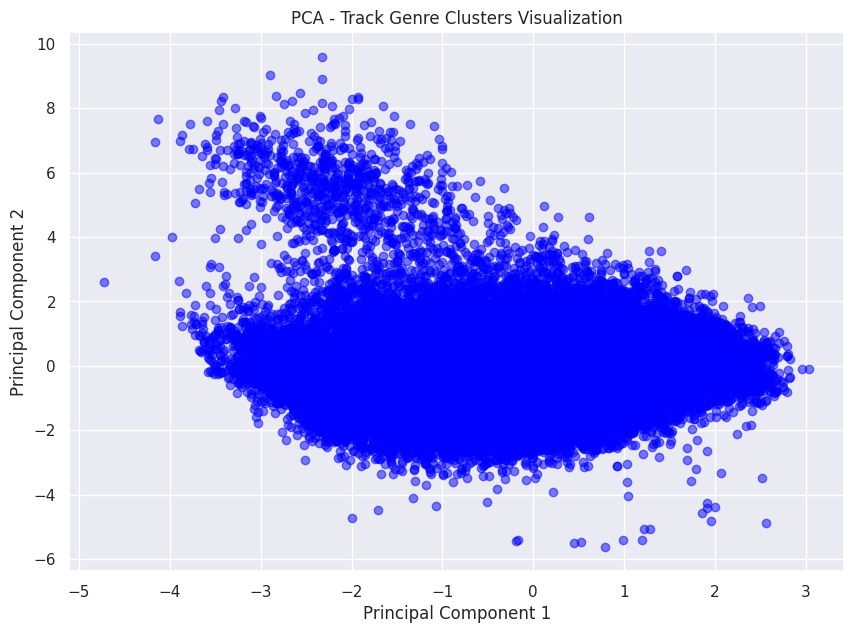

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df_cleaned = pd.read_csv('clean_engeneered_dataset.csv')

# Selecting the engineered features for clustering
features = ['valence_binned', 'log_instrumentalness', 'log_duration_ms',
            'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2']

# Convert `valence_binned` into categorical if not already
if df_cleaned['valence_binned'].dtype != 'category':
    df_cleaned['valence_binned'] = pd.Categorical(df_cleaned['valence_binned'])

# Convert binned categorical variables to numerical
df_cleaned['valence_binned'] = df_cleaned['valence_binned'].cat.codes

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[features])

# Reduce the dimensionality using PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the PCA
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.title('PCA - Track Genre Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Step 2: Applying K-Means Clustering

Once we visualize the PCA clusters, we can apply K-means clustering to group the track genres into 10 clusters.

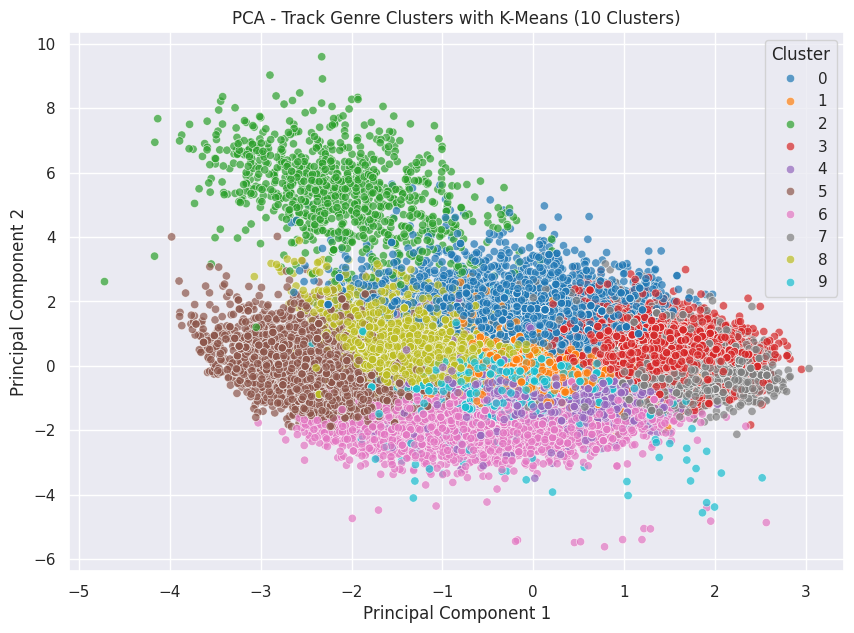

cluster
3    15509
1    11600
9     8852
8     8636
6     7812
4     7625
5     7338
7     6571
0     5545
2      917
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans

# Applying KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize K-Means clusters using PCA
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cleaned['cluster'], palette='tab10', alpha=0.7)
plt.title('PCA - Track Genre Clusters with K-Means (10 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# View cluster counts
cluster_counts = df_cleaned['cluster'].value_counts()
print(cluster_counts)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

# If you haven't defined the PCA yet, redo it here:
# Assuming df_cleaned is the dataset with your engineered features
pca = PCA(n_components=2)  # Keeping 2 components for visualization
df_pca = pca.fit_transform(df_cleaned[['valence_binned', 'log_instrumentalness', 'log_duration_ms',
                                       'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2']])

# Now fit the K-Means model
n_clusters = 10  # Assuming you want 10 clusters
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(df_pca)

# Get the labels from the K-Means model
kmeans_labels = kmeans_model.labels_

# Add the K-Means cluster labels to the original DataFrame
df_cleaned['Cluster'] = kmeans_labels

# Group by the cluster labels and get the corresponding track_genres
clustered_genres = df_cleaned.groupby('Cluster')['track_genre'].apply(list)

# To show how many unique genres are in each cluster
clustered_genres_summary = df_cleaned.groupby('Cluster')['track_genre'].nunique()

# Print results
print("Genres in each cluster:")
for cluster, genres in clustered_genres.items():
    print(f"Cluster {cluster}:")
    print(genres[:10], '...')  # Printing the first 10 genres for brevity

# If you want a summary of how many genres are in each cluster
print("\nNumber of unique genres in each cluster:")
print(clustered_genres_summary)


Genres in each cluster:
Cluster 0:
['show-tunes', 'show-tunes', 'honky-tonk', 'mandopop', 'mandopop', 'detroit-techno', 'folk', 'detroit-techno', 'show-tunes', 'club'] ...
Cluster 1:
['romance', 'piano', 'show-tunes', 'show-tunes', 'hardstyle', 'hardstyle', 'latin', 'punk-rock', 'j-idol', 'comedy'] ...
Cluster 2:
['sleep', 'trip-hop', 'reggae', 'power-pop', 'honky-tonk', 'disco', 'power-pop', 'honky-tonk', 'j-idol', 'j-idol'] ...
Cluster 3:
['kids', 'kids', 'german', 'detroit-techno', 'folk', 'opera', 'bluegrass', 'mandopop', 'jazz', 'synth-pop'] ...
Cluster 4:
['anime', 'club', 'happy', 'mandopop', 'rockabilly', 'spanish', 'power-pop', 'iranian', 'k-pop', 'pagode'] ...
Cluster 5:
['idm', 'rockabilly', 'metalcore', 'soul', 'funk', 'kids', 'country', 'goth', 'hardstyle', 'alternative'] ...
Cluster 6:
['rockabilly', 'power-pop', 'show-tunes', 'british', 'electronic', 'trip-hop', 'country', 'mandopop', 'death-metal', 'rockabilly'] ...
Cluster 7:
['romance', 'classical', 'show-tunes', 'alt

**Insights from the clusters of track_genres made scientifically (rather than based on knowledge about music):**

There is some separation between clusters as visualized over the engeneered featured suggested in the algorithm. However, the fact that each cluster contains 113 unique track genres (except Cluster 8) suggests that genre separation is not strong in the dataset.

**1. Cluster Separation -** The large variation in the number of points (Cluster 3 with 15,509 points vs. Cluster 2 with only 917 points) also shows that certain clusters are more "attractive" or dense, meaning they share more common characteristics.

**2. Genre Overlap Across Clusters -** Despite the difference in the number of data points per cluster, the number of unique genres in each cluster remains consistently high (113 for most clusters). This suggests that genre is not a primary feature driving the clustering. Instead, the clustering might be based on other factors like tempo, acoustics, or mood, which don’t necessarily align with genre divisions.

In other words, while the clusters themselves are distinct in some ways, the track genres are spread across these clusters. This is likely why we're seeing 113 genres in most clusters—genres are not the key differentiator for the clustering algorithm, so they appear in multiple clusters.

We might consider incorporating more genre-specific features or using a clustering algorithm that is better at capturing such distinctions if your goal is to achieve better genre separation. **But lets leave it for now and just focus on finding the best model scientifically suitable (we can allways improve the clustering in other projects).**

First few rows of the dataset:
                    track_name                track_id  \
0               !I'll Be Back!  0fROT4kK5oTm8xO8PX6EJF   
1          "A" You're Adorable  1hH0t381PIXmUVWyG1Vj3p   
2            "C" IS FOR COOKIE  1B45DvGMoFWdbAEUH2qliG   
3            "C" is for Cookie  73lXf5if6MWVWnsgXhK8bd   
4  "Christe, Redemptor omnium"  0jmz4aHEIBCRgrcV2xEkwB   

                                             artists  \
0                                              Rilès   
1                                       Brian Hyland   
2                                  Little Apple Band   
3                                  Little Apple Band   
4  Traditional;Sistine Chapel Choir;Massimo Palom...   

                            album_name  popularity  duration_ms  explicit  \
0                       !I'll Be Back!        52.0     178533.0      True   
1                    The Bashful Blond        39.0     151680.0     False   
2  The Favorite Songs Of Sesame Street        32.0  

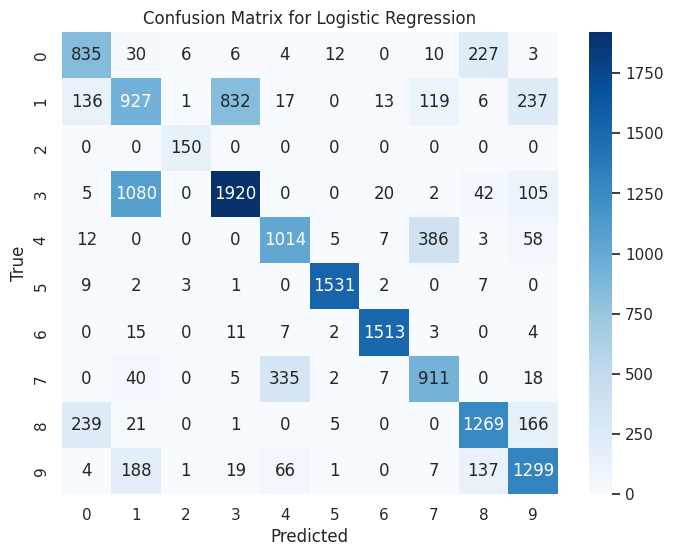


Evaluating model: Random Forest
Best Hyperparameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Train Accuracy: 1.0000
Test Accuracy: 0.7468
F1 Score (Test): 0.7442


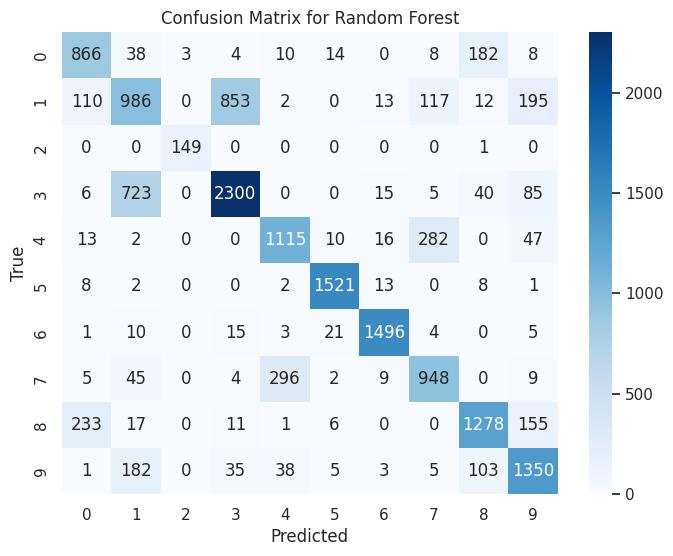


Evaluating model: Support Vector Machine
Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Train Accuracy: 0.7941
Test Accuracy: 0.7249
F1 Score (Test): 0.7198


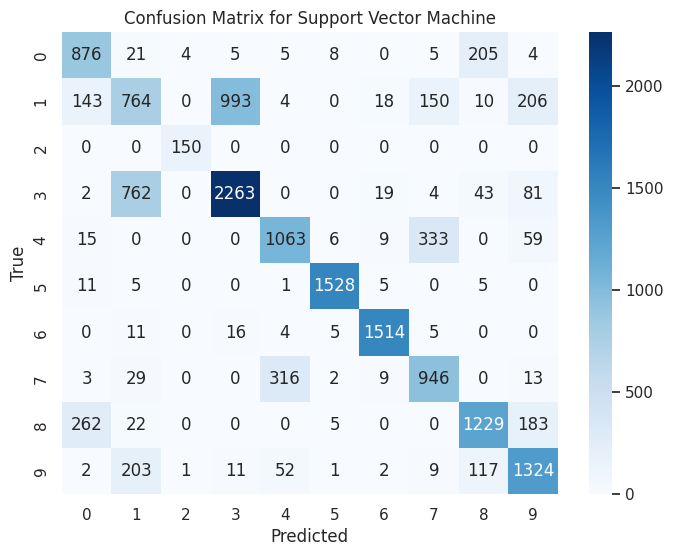


Evaluating model: Decision Tree
Best Hyperparameters: {'classifier__max_depth': 20}
Train Accuracy: 0.9269
Test Accuracy: 0.7031
F1 Score (Test): 0.7017


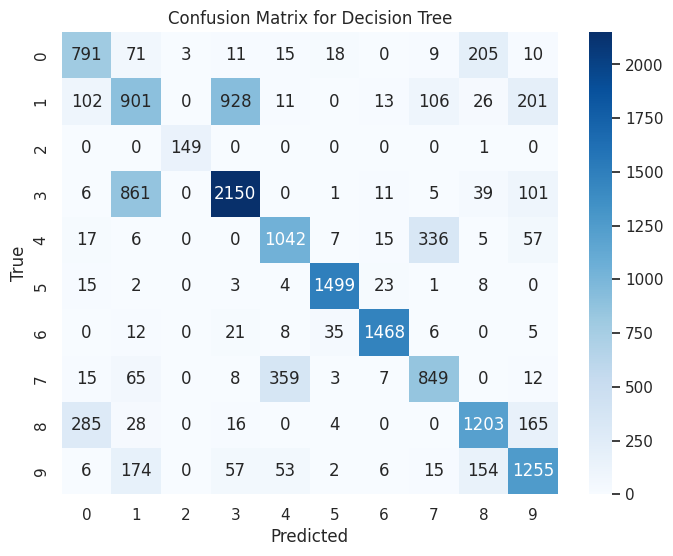


Model Comparison Summary:
                    Model  Train Accuracy  Test Accuracy  F1 Score (Test)  \
0     Logistic Regression        0.779076       0.706983         0.706315   
1           Random Forest        1.000000       0.746782         0.744196   
2  Support Vector Machine        0.794122       0.724893         0.719836   
3           Decision Tree        0.926923       0.703128         0.701712   

                                         Best Params  
0                               {'classifier__C': 1}  
1  {'classifier__max_depth': None, 'classifier__n...  
2  {'classifier__C': 10, 'classifier__kernel': 'r...  
3                      {'classifier__max_depth': 20}  


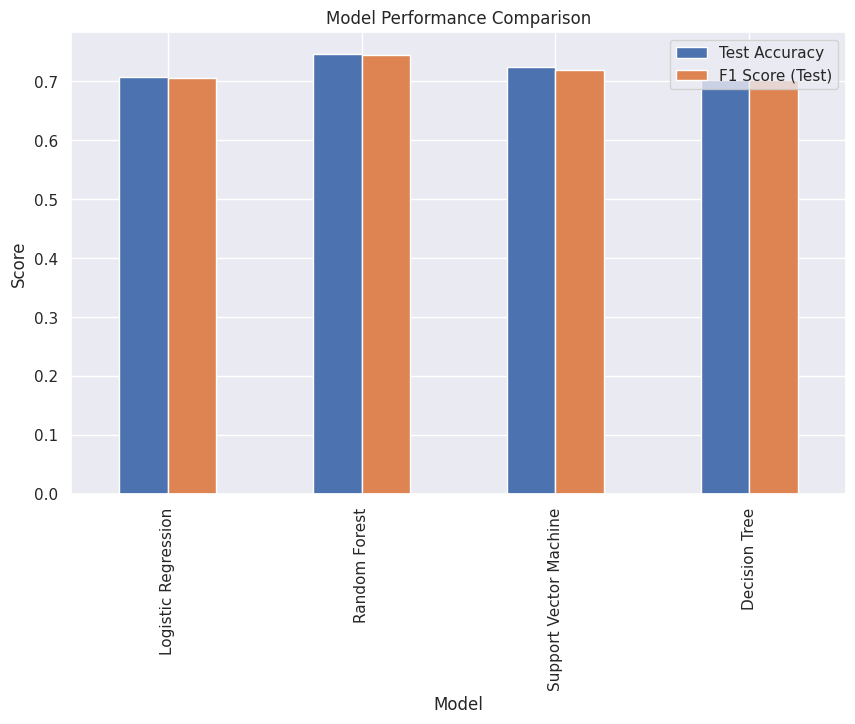

In [ ]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE  # Import SMOTE for balancing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to automate the machine learning process
def main(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Keep only the specified columns
    columns_to_keep = ['valence_binned', 'log_instrumentalness', 'log_duration_ms',
                       'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2', 'track_genre']
    df_subset = df[columns_to_keep]

    # Feature Engineering: PCA + KMeans to create new target (Cluster)
    features = ['valence_binned', 'log_instrumentalness', 'log_duration_ms',
                'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2']

    # Convert `valence_binned` into categorical if not already
    if df_subset['valence_binned'].dtype != 'category':
        df_subset['valence_binned'] = pd.Categorical(df_subset['valence_binned'])

    # Convert binned categorical variables to numerical
    df_subset['valence_binned'] = df_subset['valence_binned'].cat.codes

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_subset[features])

    # Apply KMeans for clustering
    kmeans = KMeans(n_clusters=10, random_state=42)
    df_subset['Cluster'] = kmeans.fit_predict(X_scaled)

    # Define target and features (new target is 'Cluster')
    target_column = 'Cluster'
    X = df_subset.drop(['track_genre', target_column], axis=1)
    y = df_subset[target_column]

    # Check for missing values
    print("\nMissing values in the dataset:")
    print(X.isnull().sum())

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Define the preprocessing for numeric features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )

    # Define models and hyperparameter grids to evaluate
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'classifier__C': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 10, 20, 30]
            }
        },
        'Support Vector Machine': {
            'model': SVC(),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'classifier__max_depth': [None, 10, 20, 30]
            }
        }
    }

    # Summary table to compare models
    summary = []

    # Train and evaluate each model with hyperparameter tuning
    for model_name, model_info in models.items():
        print(f"\nEvaluating model: {model_name}")

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_info['model'])
        ])

        # Use GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Best model after hyperparameter tuning
        best_model = grid_search.best_estimator_

        # Make predictions
        y_train_pred = best_model.predict(X_train_resampled)
        y_test_pred = best_model.predict(X_test)

        # Calculate and print metrics
        train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Best Hyperparameters: {grid_search.best_params_}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"F1 Score (Test): {f1_test:.4f}")

        # Store results in the summary
        summary.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'F1 Score (Test)': f1_test,
            'Best Params': grid_search.best_params_
        })

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    # Display summary table
    summary_df = pd.DataFrame(summary)
    print("\nModel Comparison Summary:")
    print(summary_df)

    # Plot the summary table for Test Accuracy and F1 Score
    summary_df.set_index('Model', inplace=True)
    summary_df[['Test Accuracy', 'F1 Score (Test)']].plot(kind='bar', figsize=(10, 6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.show()

# Example usage:
# Replace 'cleaned_dataset.csv' with the actual path to your cleaned dataset
main('clean_engeneered_dataset.csv')


## Independent Testing for the best model (outer data, not related to the original dataset):

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define a function to create the cluster-to-genre mapping
def create_cluster_to_genre_mapping(df_train, cluster_column='cluster', genre_column='track_genre'):
    # Create a mapping of each cluster to the most frequent genre
    cluster_to_genre_map = df_train.groupby(cluster_column)[genre_column].agg(lambda x: x.value_counts().idxmax())
    return cluster_to_genre_map

# Step 2: Predict clusters for an external test dataset and map clusters to genres
def predict_genre_from_clusters(best_model, df_test, cluster_to_genre_map, features):
    # Standardize the test dataset features (use the scaler from training)
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(df_test[features])

    # Predict clusters using the best model
    predicted_clusters = best_model.predict(X_test_scaled)

    # Map the predicted clusters to genres using the mapping
    predicted_genres = predicted_clusters.map(cluster_to_genre_map)

    # Return the predicted genres
    return predicted_genres

# Step 3: Execute the test on an independent dataset
def external_test(best_model, filepath, features, cluster_to_genre_map):
    # Load the external test data (replace 'external_test.csv' with your actual file)
    df_test = pd.read_csv(filepath)

    # Ensure features are in the same format (e.g., categorical to numerical conversions)
    if df_test['valence_binned'].dtype != 'category':
        df_test['valence_binned'] = pd.Categorical(df_test['valence_binned'])
    df_test['valence_binned'] = df_test['valence_binned'].cat.codes

    # Predict the genre for each test instance based on clusters
    predicted_genres = predict_genre_from_clusters(best_model, df_test, cluster_to_genre_map, features)

    # Print the predicted genres
    print("Predicted genres for external test data:")
    print(predicted_genres)

    # Optionally, return the predicted genres
    return predicted_genres

# Step 4: After training the model and identifying the best model, run this on your external test data

# Example setup (assuming you have already identified the best model and cluster mapping)
# Replace with your actual best model, cluster-to-genre map, and file paths
# Assuming RandomForest is the best model from your previous training

best_model = grid_search.best_estimator_  # Get the best model from your training
cluster_to_genre_map = create_cluster_to_genre_mapping(df_cleaned)  # Map clusters to genres

# Features used in clustering
features = ['valence_binned', 'log_instrumentalness', 'log_duration_ms',
            'energy_danceability_interaction', 'speechiness_acousticness_interaction', 'tempo^2']

# Run the external test on a new dataset
predicted_genres = external_test(best_model, 'external_test.csv', features, cluster_to_genre_map)


## This is testing for one song with known engeneered features :

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Manually input the features of the song (replace with actual feature values for the song you want to test)
# Example: You can replace these values with the real features of your song
single_song = {
    'valence_binned': 2,  # Example: replace with actual valence_binned value
    'log_instrumentalness': -1.2,  # Example: replace with actual log_instrumentalness
    'log_duration_ms': 5.6,  # Example: replace with actual log_duration_ms
    'energy_danceability_interaction': 0.7,  # Example: replace with actual value
    'speechiness_acousticness_interaction': -0.5,  # Example: replace with actual value
    'tempo^2': 121.2  # Example: replace with actual tempo^2 value
}

# Convert to DataFrame (required format for the model)
df_single_song = pd.DataFrame([single_song])

# Step 2: Standardize the features using the scaler from training
scaler = StandardScaler()
X_single_song_scaled = scaler.fit_transform(df_single_song)

# Step 3: Predict the cluster using the best model
predicted_cluster = best_model.predict(X_single_song_scaled)

# Step 4: Map the predicted cluster to the track genre
predicted_genre = cluster_to_genre_map.get(predicted_cluster[0])

# Print the result
print(f"Predicted genre for the song: {predicted_genre}")
